In [7]:
import os
import shutil
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
import cv2

In [3]:
train_directory = "../../merged_dataset/Train/"
test_directory = "../../merged_dataset/Test/"
CLASS_NAMES = ['Fresh', 'Rotten']

In [5]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=99,
)

Found 4424 files belonging to 2 classes.


In [6]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=99,
)

Found 1251 files belonging to 2 classes.


In [8]:
image = cv2.imread('../../reduced_dataset/Train/Rotten/rottenapples/a_r173.png')
image = cv2.resize(image, (64, 64))
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)

In [9]:
grid_size = 64
height, width = edges.shape
cell_height = height // grid_size
cell_width = width // grid_size

fractional_grid = np.zeros((grid_size, grid_size))

In [10]:
for i in range(grid_size):
    for j in range(grid_size):
        cell = edges[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width]
        has_object_part = np.any(cell > 0)
        
        if has_object_part:
            fractional_grid[i, j] = 1

            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            fractional_grid[i, j] += 0.5
        else:
            fractional_grid[i, j] = 0

            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            fractional_grid[i, j] += 0.5

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(64, 64))

ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

cax = ax[1].imshow(fractional_grid, cmap='viridis', interpolation='nearest')
ax[1].set_title('Fractional Codes Result')
fig.colorbar(cax, ax=ax[1])

for i in range(grid_size):
    for j in range(grid_size):
        ax[1].text(j, i, f'{fractional_grid[i, j]:.1f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig('visualizations/fractional_codes_result_colored.png', dpi=300, bbox_inches='tight')
plt.show()

print("Fractional Grid Values:")
print(fractional_grid)

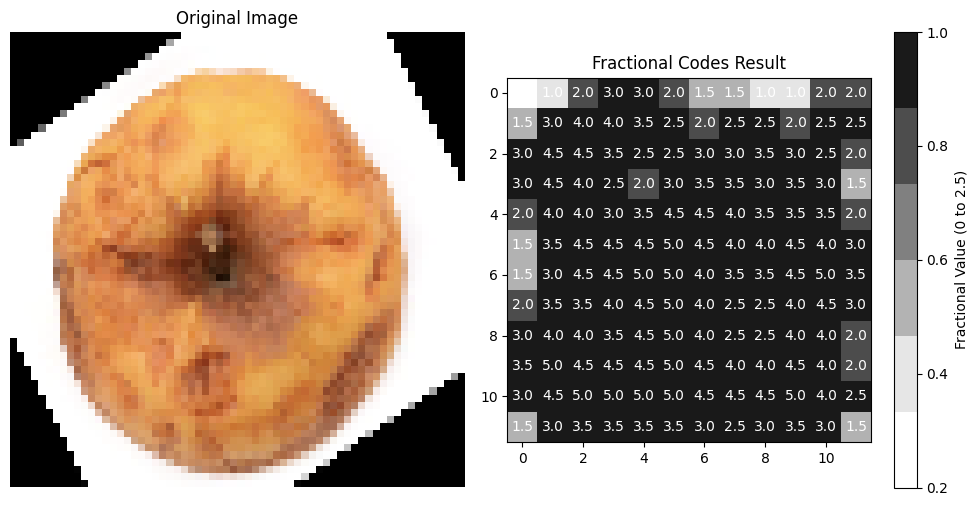

Fractional Grid Values:
[[0.5 1.  2.  3.  3.  2.  1.5 1.5 1.  1.  2.  2. ]
 [1.5 3.  4.  4.  3.5 2.5 2.  2.5 2.5 2.  2.5 2.5]
 [3.  4.5 4.5 3.5 2.5 2.5 3.  3.  3.5 3.  2.5 2. ]
 [3.  4.5 4.  2.5 2.  3.  3.5 3.5 3.  3.5 3.  1.5]
 [2.  4.  4.  3.  3.5 4.5 4.5 4.  3.5 3.5 3.5 2. ]
 [1.5 3.5 4.5 4.5 4.5 5.  4.5 4.  4.  4.5 4.  3. ]
 [1.5 3.  4.5 4.5 5.  5.  4.  3.5 3.5 4.5 5.  3.5]
 [2.  3.5 3.5 4.  4.5 5.  4.  2.5 2.5 4.  4.5 3. ]
 [3.  4.  4.  3.5 4.5 5.  4.  2.5 2.5 4.  4.  2. ]
 [3.5 5.  4.5 4.5 4.5 5.  4.5 4.  4.  4.5 4.  2. ]
 [3.  4.5 5.  5.  5.  5.  4.5 4.5 4.5 5.  4.  2.5]
 [1.5 3.  3.5 3.5 3.5 3.5 3.  2.5 3.  3.5 3.  1.5]]


In [32]:
# import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the image (replace with your image containing a banana or any object)
image = cv2.imread('../../reduced_dataset/Train/Rotten/rottenapples/a_r173.png')  # Replace with your image path
image = cv2.resize(image, (64, 64))  # Resize to 64x64 for 6x6 grid (approx. 10x10 pixels per cell)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for object detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply edge detection to approximate object presence (e.g., banana)
edges = cv2.Canny(gray, 100, 200)

# Define grid dimensions (6x6 to match your uploaded image)
grid_size = 12
height, width = edges.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Initialize fractional grid
fractional_grid = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        cell = edges[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width]
        has_object_part = np.any(cell > 0)  # True if edge detected (object part)
        
        if has_object_part:
            fractional_grid[i, j] = 1
            
            # Check neighboring cells
            neighbor_count = 0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            neighbor_count += 1
            fractional_grid[i, j] += 0.5 * neighbor_count
        else:
            fractional_grid[i, j] = 0  # Base value for no object part
            
            # Add 0.5 for each neighboring cell with object part
            neighbor_count = 0
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            neighbor_count += 1
            fractional_grid[i, j] += 0.5 * neighbor_count

# Define custom colormap for fractional values
colors = [(1, 1, 1), (0.9, 0.9, 0.9), (0.7, 0.7, 0.7), (0.5, 0.5, 0.5), (0.3, 0.3, 0.3), (0.1, 0.1, 0.1)]  # White to nearly black
n_bins = 6  # Number of bins
cmap = LinearSegmentedColormap.from_list('custom_gray', colors, N=n_bins)

# Normalize fractional_grid to [0, 1] for colormap
norm_fractional_grid = np.clip(fractional_grid / 2.5, 0, 1)

# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Original image
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Fractional grid heatmap with custom colormap
cax = ax[1].imshow(norm_fractional_grid, cmap=cmap, interpolation='nearest')
ax[1].set_title('Fractional Codes Result')
fig.colorbar(cax, ax=ax[1], ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], label='Fractional Value (0 to 2.5)')

# Overlay the fractional values
for i in range(grid_size):
    for j in range(grid_size):
        ax[1].text(j, i, f'{fractional_grid[i, j]:.1f}', ha='center', va='center', color='white')

plt.tight_layout()
plt.show()

# Print the fractional grid
print("Fractional Grid Values:")
print(fractional_grid)

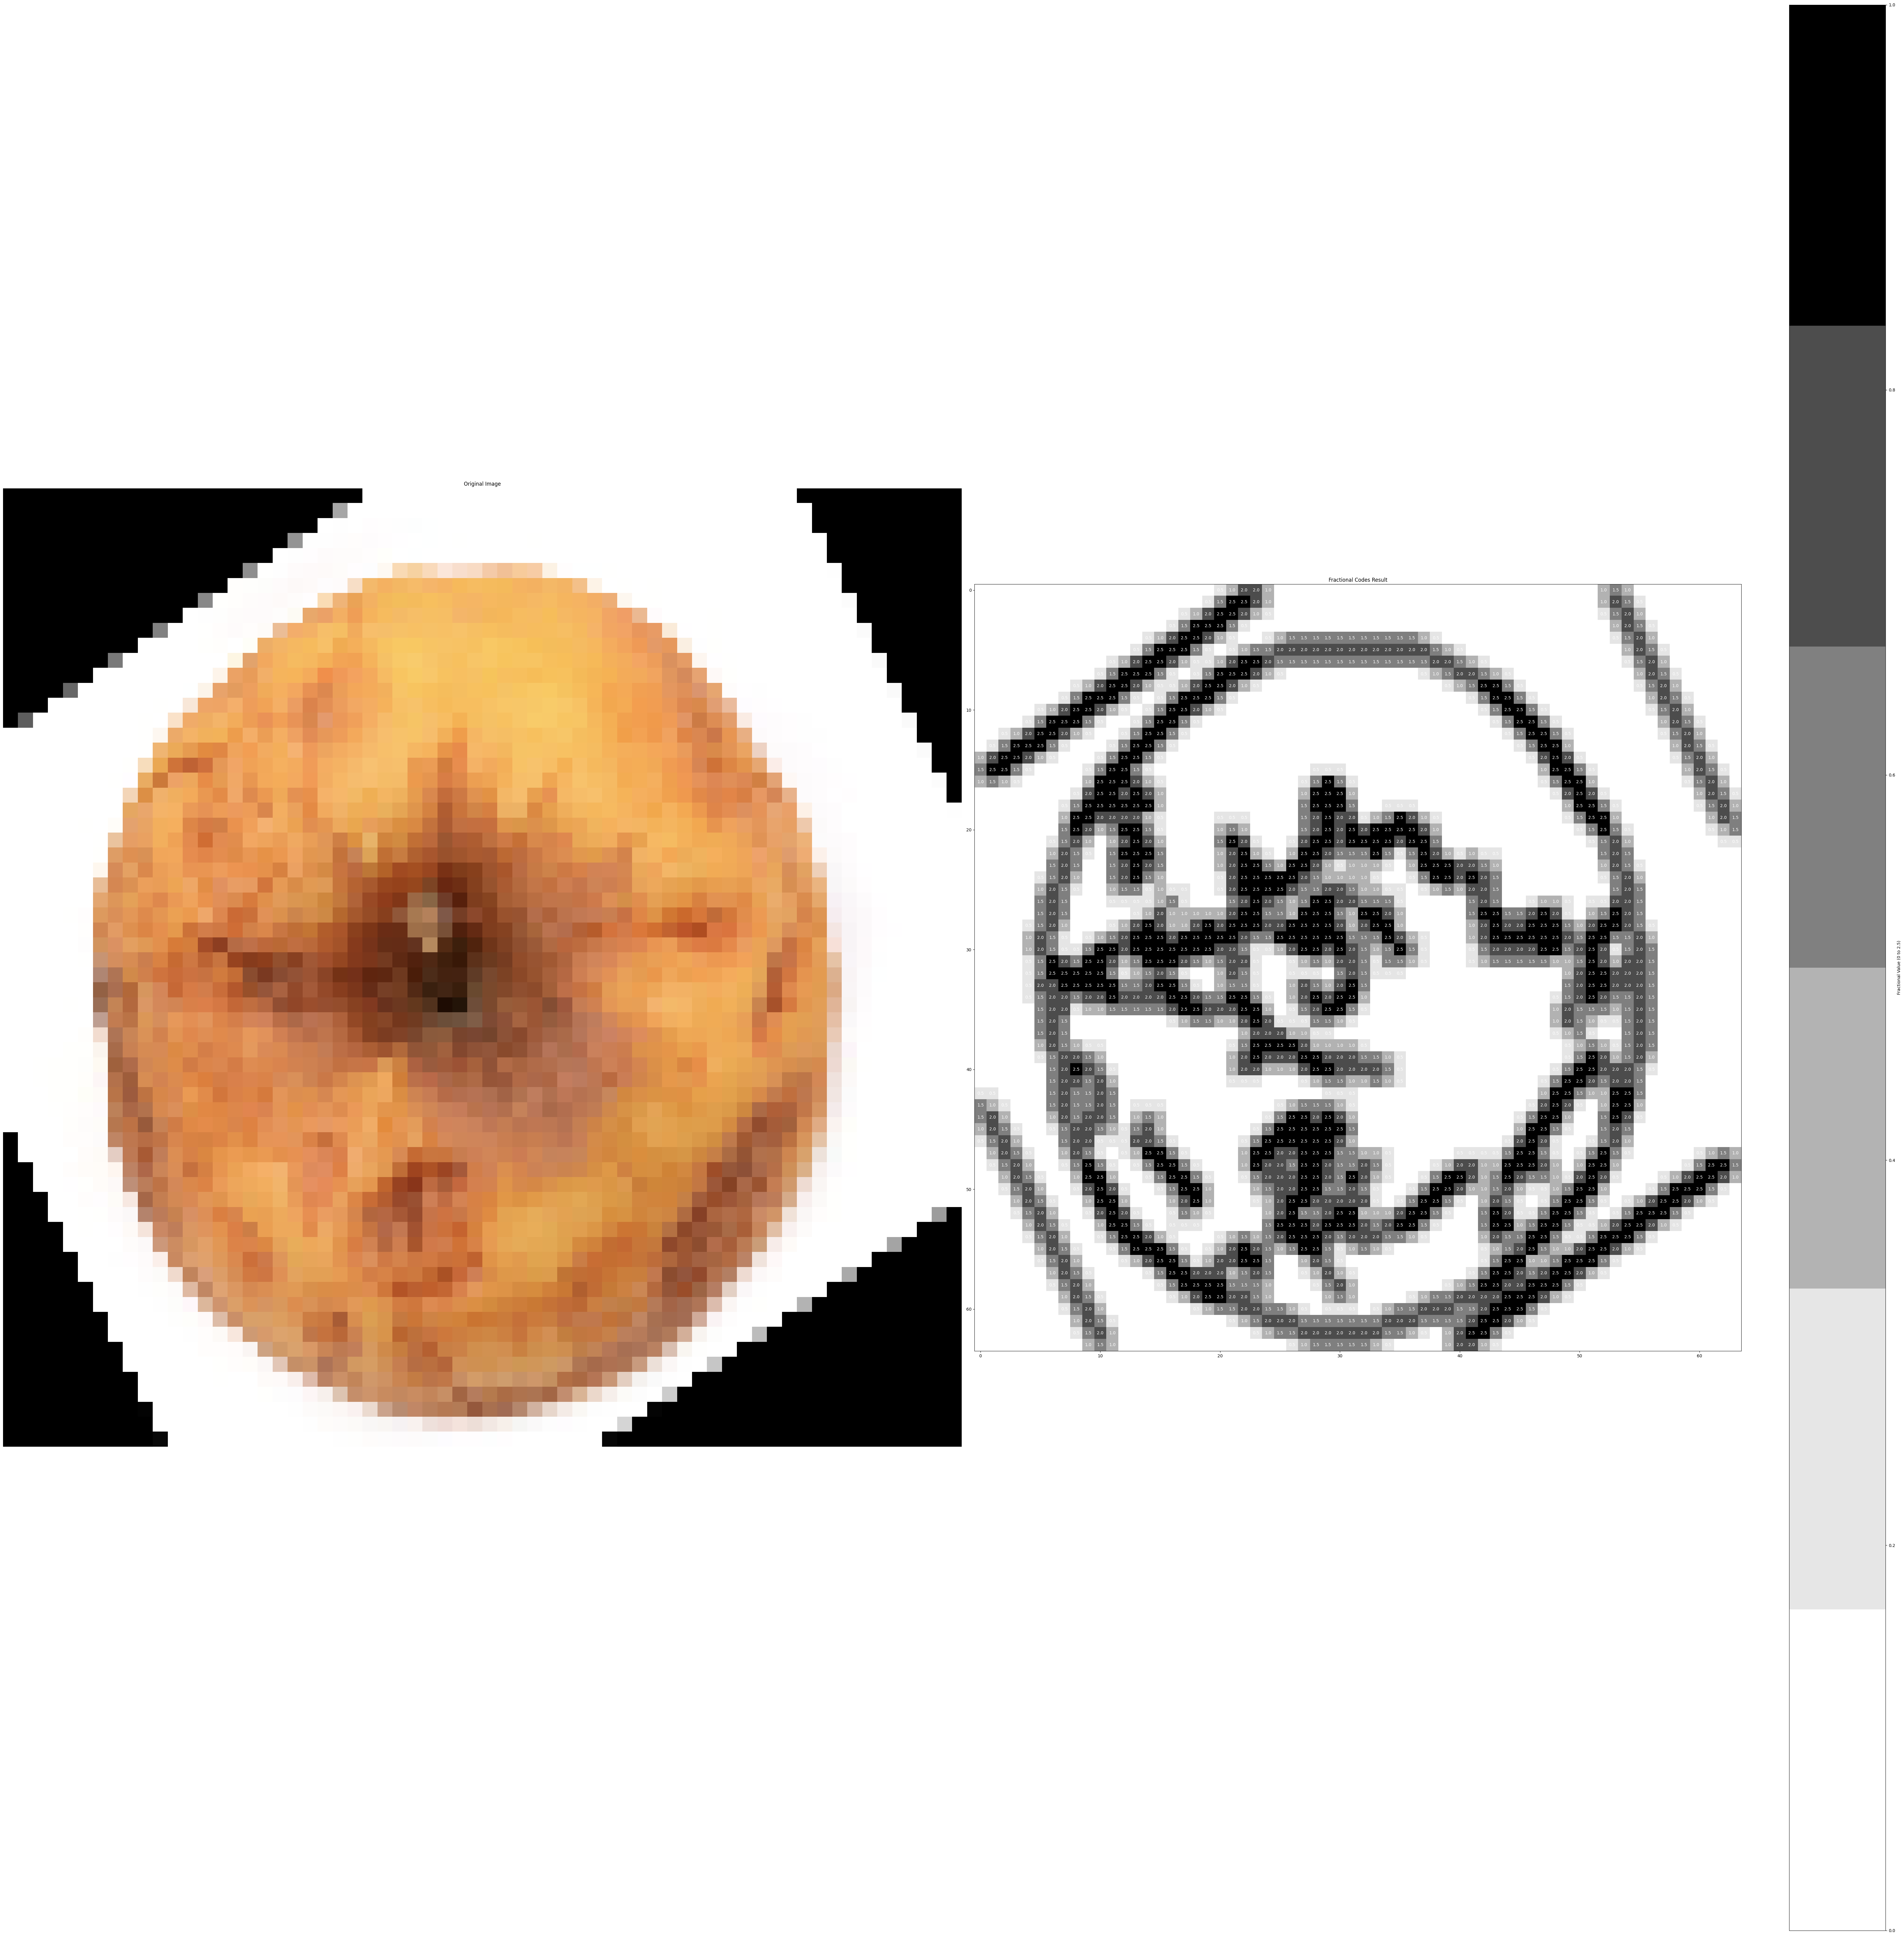

Fractional Grid Values:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Load the image
image = cv2.imread('../../reduced_dataset/Train/Rotten/rottenapples/a_r173.png')
image = cv2.resize(image, (64, 64))  # Resize to 256x256
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for object detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Apply edge detection to approximate object presence (e.g., rotten apple)
edges = cv2.Canny(gray, 100, 200)

# Define grid dimensions (256x256 grid, as per your code)
grid_size = 64
height, width = edges.shape
cell_height = height // grid_size
cell_width = width // grid_size

# Initialize fractional grid
fractional_grid = np.zeros((grid_size, grid_size))

# Check each cell for object parts and apply fractional logic
for i in range(grid_size):
    for j in range(grid_size):
        cell = edges[i * cell_height:(i + 1) * cell_height, j * cell_width:(j + 1) * cell_width]
        has_object_part = np.any(cell > 0)  # True if edge detected (object part)
        
        if has_object_part:
            fractional_grid[i, j] = 1  # Base value for object part
            
            # Check neighboring cells
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            fractional_grid[i, j] += 0.5
        else:
            fractional_grid[i, j] = 0  # Base value for no object part
            
            # Add 0.5 for each neighboring cell with object part
            for di in [-1, 0, 1]:
                for dj in [-1, 0, 1]:
                    if di == 0 and dj == 0:
                        continue
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size:
                        neighbor_cell = edges[ni * cell_height:(ni + 1) * cell_height, nj * cell_width:(nj + 1) * cell_width]
                        if np.any(neighbor_cell > 0):
                            fractional_grid[i, j] += 0.5

# Cap values at 2.5
fractional_grid = np.minimum(fractional_grid, 2.5)

# Define custom colormap from white to black
colors = [(1, 1, 1), (0.9, 0.9, 0.9), (0.7, 0.7, 0.7), (0.5, 0.5, 0.5), (0.3, 0.3, 0.3), (0, 0, 0)]  # White to black
n_bins = 6  # Number of bins
cmap = LinearSegmentedColormap.from_list('white_to_black', colors, N=n_bins)

# Normalize fractional_grid to [0, 1] for colormap (0 to 2.5 mapped to 0 to 1)
norm_fractional_grid = np.clip(fractional_grid / 2.5, 0, 1)

# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(64, 64))  # Adjusted figure size for better visualization

# Original image
ax[0].imshow(image_rgb)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Fractional grid heatmap with custom colormap
cax = ax[1].imshow(norm_fractional_grid, cmap=cmap, interpolation='nearest')
ax[1].set_title('Fractional Codes Result')
fig.colorbar(cax, ax=ax[1], ticks=[0, 0.2, 0.4, 0.6, 0.8, 1], label='Fractional Value (0 to 2.5)')

# Overlay the fractional values
for i in range(grid_size):
    for j in range(grid_size):
        ax[1].text(j, i, f'{fractional_grid[i, j]:.1f}', ha='center', va='center', color='white')

# Save the figure to your computer
plt.tight_layout()
plt.savefig('fractional_codes_result_bw.png', dpi=300, bbox_inches='tight')  # Save as PNG with high resolution
plt.show()

# Print the fractional grid
print("Fractional Grid Values:")
print(fractional_grid)